## Calcualte structural and sequnece identity between two sets 

In [1]:
import pandas as pd

from Bio import SeqIO

test_set = set(list(pd.read_csv('Low30_mmseq_ID_exp_subset.txt', sep='\t', header=None)[0].values))
train_seqs = []
test_seqs = []
for seq_record in SeqIO.parse("All_seqs_at_90_id.fasta", "fasta"):
    seq_id = seq_record.id.split('|')[1]
    if seq_id in test_set:
        test_seqs.append([seq_id, str(seq_record.seq)])
    else:
        train_seqs.append([seq_id, str(seq_record.seq)])

# Read in the ones 
test_seqs = pd.DataFrame(test_seqs, columns=['Entry', 'Sequence'])
train_seqs = pd.DataFrame(train_seqs, columns=['Entry', 'Sequence'])

print(len(test_seqs), len(train_seqs))

252 5355


In [2]:
test_seqs

,Entry,Sequence
0,A0A0B5LB55,MSTEKFTITEHLVPGSHIREYPGSTVNQEDVLKIHVKQYTPKREGP...
1,A0A2U9GGW3,MAPLGVSGLVGKLSTELEVDCDAEKYYNMYKHGEDVKKAVPHLCVD...
2,A2T3S5,MKVLALRHSVAQVYADTQVYVHDDTKDSYENAFLISNLTTHNILYL...
3,A5JTM5,MYEAIGHRVEDGVAEITIKLPRHRNALSVKAMQEVTDALNRAEEDD...
4,B3TMR8,MENPANANPIRVGVIGCADIAWRRALPALEAEPLTEVTAIASRRWD...
...,...,...
247,P38488,MQMPKTLRIRNGDKVRSTFSAQEYANRQARLRAHLAAENIDAAIFT...
248,P78067,MKRVSQMTALAMALGLACASSWAAELAKPLTLDQLQQQNGKAIDTR...
249,Q56148,MTTRMIILNGGSSAGKSGIVRCLQSVLPEPWLAFGVDSLIEAMPLK...
250,Q56694,MNPQTDNVFYATNAFTGEALPLAFPVHTEVEVNQAATAAAKVARDF...


# Quickly do BLAST to check the seq identity between the two sets...


In [3]:
# Remove from SwissProt
import sys
sys.path.append('/disk1/ariane/vscode/enzyme-tk/enzymetk/')
from steps.sequence_search_blast import BLAST
from steps.save_step import Save
# Now we're going to save this as a fasta file 
fasta_label = f'Low30_mmseq_ID_exp_subset_train.fasta'
with open(fasta_label, 'w+') as fout:
    for entry, seq in train_seqs[['Entry', 'Sequence']].values:
        if entry not in test_set:
            fout.write(f'>{entry}\n{seq}\n')
        else:
            # Just making double sure no contamination
            print(f"{entry} in training set?")
# Do blast on this dataset 
# This should be where you downloaded the data from zotero, there is a folder in there called AS_inference
# This contains the models and the data needed to run the tool
id_col = 'Entry'
seq_col = 'Sequence'
test_seqs << (BLAST(id_col, seq_col, database=fasta_label, args=['--ultra-sensitive']) >> Save(f'blast/Squidly_BLAST_Low30_mmseq_ID_exp_subset.pkl'))

['diamond', 'blastp', '--ultra-sensitive', '-d', '/tmp/tmp3rurty7i/R3AgZJzDxt_db', '-q', '/tmp/tmp3rurty7i/R3AgZJzDxt_query.fasta', '-o', '/tmp/tmp3rurty7i/R3AgZJzDxt_matches.tsv']
--------------------------------------------------------------------------------
Running command	diamond blastp --ultra-sensitive -d /tmp/tmp3rurty7i/R3AgZJzDxt_db -q /tmp/tmp3rurty7i/R3AgZJzDxt_query.fasta -o /tmp/tmp3rurty7i/R3AgZJzDxt_matches.tsv	
--------------------------------------------------------------------------------


diamond v2.1.11.165 (C) Max Planck Society for the Advancement of Science, Benjamin Buchfink, University of Tuebingen
Documentation, support and updates available at http://www.diamondsearch.org
Please cite: http://dx.doi.org/10.1038/s41592-021-01101-x Nature Methods (2021)

#CPU threads: 384
Scoring parameters: (Matrix=BLOSUM62 Lambda=0.267 K=0.041 Penalties=11/1)
Database input file: Low30_mmseq_ID_exp_subset_train.fasta
Opening the database file...  [0.001s]
Loading sequences...  [0.008s]
Masking sequences...  [0.029s]
Writing sequences...  [0.001s]
Hashing sequences...  [0s]
Loading sequences...  [0s]
Writing trailer...  [0s]
Closing the input file...  [0s]
Closing the database file...  [0.004s]

Database sequences  5355
  Database letters  2195041
     Database hash  af5530a8efa5117c2130e2159a2377a9
        Total time  0.045000s
diamond v2.1.11.165 (C) Max Planck Society for the Advancement of Science, Benjamin Buchfink, University of Tuebingen
Documentation, support and updates a

--------------------------------------------------------------------------------
                                    Output:	                                    
--------------------------------------------------------------------------------

--------------------------------------------------------------------------------
Error:	diamond v2.1.11.165 (C) Max Planck Society for the Advancement of Science, Benjamin Buchfink, University of Tuebingen
Documentation, support and updates available at http://www.diamondsearch.org
Please cite: http://dx.doi.org/10.1038/s41592-021-01101-x Nature Methods (2021)

#CPU threads: 384
Scoring parameters: (Matrix=BLOSUM62 Lambda=0.267 K=0.041 Penalties=11/1)
Temporary directory: /tmp/tmp3rurty7i
#Target sequences to report alignments for: 25
Opening the database...  [0.002s]
Database: /tmp/tmp3rurty7i/R3AgZJzDxt_db (type: Diamond database, sequences: 5355, letters: 2195041)
Block size = 400000000
Opening the input file...  [0s]
Opening the output file..

,query,target,sequence identity,length,mismatch,gapopen,query start,query end,target start,target end,e-value,bitscore
0,A5JTM5,A4YI89,28.9,228,149,2,2,225,3,221,7.370000e-27,102.0
1,A5JTM5,Q5SKU3,34.3,207,129,6,8,211,3,205,1.340000e-23,94.0
2,A5JTM5,P52046,27.7,224,156,2,10,232,11,229,3.010000e-23,93.2
3,A5JTM5,Q5LLW6,29.8,215,135,5,10,213,18,227,8.640000e-21,86.7
4,A5JTM5,O53561,30.6,196,120,4,16,204,21,207,2.850000e-18,79.7
...,...,...,...,...,...,...,...,...,...,...,...,...
451,Q56694,P94358,19.6,424,297,13,1,413,27,417,1.460000e-06,48.1
452,Q56694,Q56R04,24.9,257,146,9,25,263,43,270,1.970000e-06,47.8
453,Q56694,P56533,30.6,160,100,5,137,296,156,304,2.590000e-06,47.4
454,Q56694,Q92UV7,25.2,246,165,7,48,290,63,292,7.740000e-06,45.8


(array([ 1.,  2.,  6., 18., 25., 23.,  8.,  4.,  5.,  2.]),
 array([19.4 , 21.13, 22.86, 24.59, 26.32, 28.05, 29.78, 31.51, 33.24,
        34.97, 36.7 ]),
 <BarContainer object of 10 artists>)

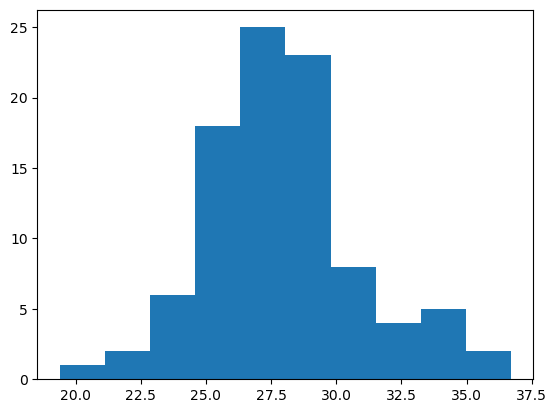

In [6]:
blast_df = pd.read_pickle(f'blast/Squidly_BLAST_Low30_mmseq_ID_exp_subset.pkl')
blast_df = blast_df.sort_values(by='sequence identity', ascending=False)
blast_df.drop_duplicates('query', inplace=True)
import matplotlib.pyplot as plt

plt.hist(blast_df['sequence identity'].values)

# great looks good now let's download the uniprot structrues 

First just save each DF then we'll downloadn using the API from AlphaFold

In [8]:
test_seqs.to_csv('Low30_mmseq_ID_exp_subset_test.csv', index=False)
train_seqs.to_csv('Low30_mmseq_ID_exp_subset_train.csv', index=False)